In [22]:
#Importare il file owid-covid-data:

from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.xlsx to owid-covid-data (1).xlsx


In [23]:

import pandas as pd

df = pd.read_excel('owid-covid-data (1).xlsx')



In [24]:
#verificare le dimensioni del dataset e i relativi metadati

print(df.shape)
print(df.info())
print(df.describe())


(429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-nu

In [25]:
#pulire il dataset: eliminare le righe duplicate, trasformare i dati nulli impliciti in espliciti sostituendo le celle vuote con None

# Eliminare le righe duplicate
df.drop_duplicates(inplace=True)

# Trasformare i dati nulli impliciti in espliciti
df.replace('', None, inplace=True)


In [26]:
#per ogni continente trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

# Filtrare le righe con continente non nullo
df_continent = df[df['continent'].notna()]

# Raggruppare per continente e sommare i casi totali
casi_totali_x_continente = df_continent.groupby('continent')['total_cases'].sum()

# Stampare i risultati
print(casi_totali_x_continente)


continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64


In [27]:
#scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

def confronta_continenti(continente1, continente2):
  """
  Confronta i descrittori statistici di due continenti.

  Args:
    continente1: Nome del primo continente.
    continente2: Nome del secondo continente.
  """

  # Filtrare i dati per i due continenti
  df_cont1 = df[df['continent'] == continente1]
  df_cont2 = df[df['continent'] == continente2]

  # Calcolare i descrittori statistici
  max_cont1 = df_cont1['total_cases'].max()
  mean_cont1 = df_cont1['total_cases'].mean()
  max_cont2 = df_cont2['total_cases'].max()
  mean_cont2 = df_cont2['total_cases'].mean()

  # Calcolare il numero totale di casi nel mondo
  total_cases_world = df['total_cases'].sum()

  # Calcolare la percentuale di casi rispetto al totale mondiale
  percent_cont1 = (df_cont1['total_cases'].sum() / total_cases_world) * 100
  percent_cont2 = (df_cont2['total_cases'].sum() / total_cases_world) * 100

  # Stampare i risultati
  print(f"Confronto tra {continente1} e {continente2}:")
  print(f"Valore massimo {continente1}: {max_cont1}")
  print(f"Media {continente1}: {mean_cont1}")
  print(f"Percentuale {continente1}: {percent_cont1:.2f}%")
  print(f"Valore massimo {continente2}: {max_cont2}")
  print(f"Media {continente2}: {mean_cont2}")
  print(f"Percentuale {continente2}: {percent_cont2:.2f}%")


# Esempio di utilizzo
confronta_continenti('Europe', 'Asia')


Confronto tra Europe e Asia:
Valore massimo Europe: 38997490.0
Media Europe: 2773170.803183639
Percentuale Europe: 7.81%
Valore massimo Asia: 99373219.0
Media Asia: 3205054.9991865577
Percentuale Asia: 8.31%


<ipython-input-32-ffd22ffc179a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italia_2022['date'] = pd.to_datetime(df_italia_2022['date'])


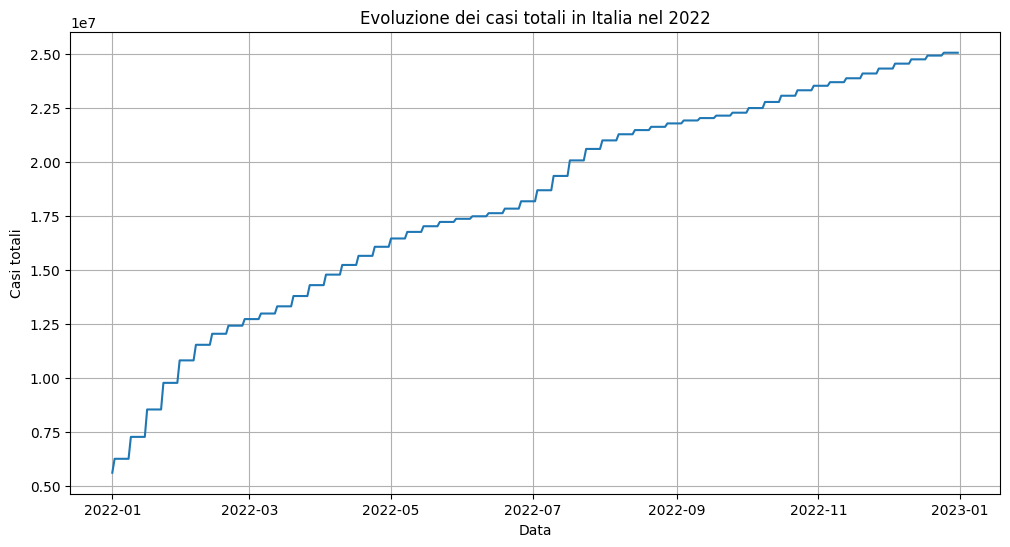

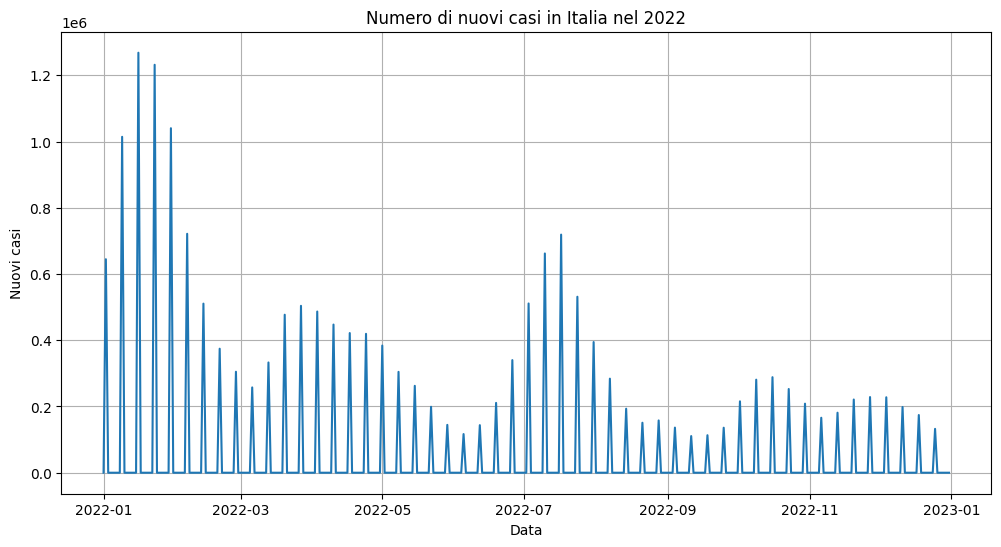

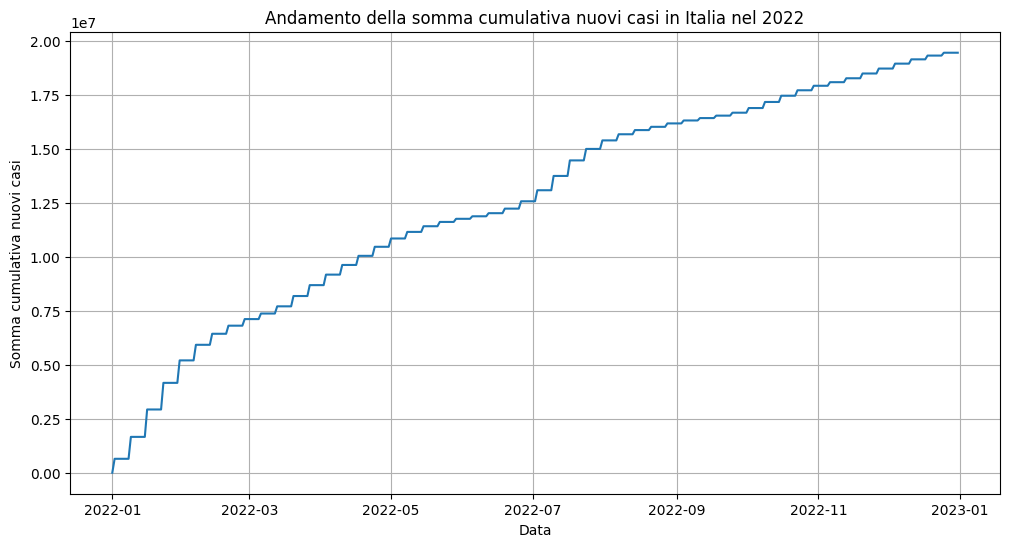

In [32]:
#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022.

import matplotlib.pyplot as plt

# Selezionare i dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'] >= '2022-01-01') & (df['date'] <= '2022-12-31')]

# Convertire la colonna 'date' in formato datetime
df_italia_2022['date'] = pd.to_datetime(df_italia_2022['date'])

# Ordinare il dataframe per data
df_italia_2022 = df_italia_2022.sort_values('date')

# Grafico dell'evoluzione dei casi totali
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['total_cases'])
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.grid(True)
plt.show()

# Grafico del numero di nuovi casi
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['new_cases'])
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.grid(True)
plt.show()

# Calcolare la somma cumulativa dei nuovi casi
df_italia_2022['cumulative_new_cases'] = df_italia_2022['new_cases'].cumsum()

# Grafico dell'andamento della somma cumulativa nuovi casi
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['cumulative_new_cases'])
plt.xlabel('Data')
plt.ylabel('Somma cumulativa nuovi casi')
plt.title('Andamento della somma cumulativa nuovi casi in Italia nel 2022')
plt.grid(True)
plt.show()

# Osservando i grafici, si nota una forte similarità tra l'andamento della somma cumulativa dei nuovi casi e l'andamento del numero dei casi totali.
# Questo è dovuto al fatto che la somma cumulativa dei nuovi casi rappresenta l'accumulo dei casi nel tempo, il che riflette l'andamento generale dei casi totali.


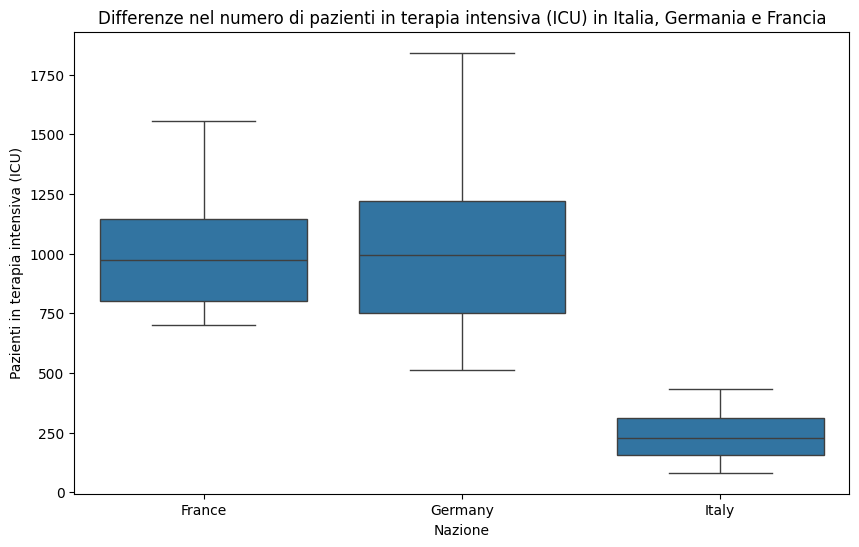

In [35]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

# Filtrare i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023
df_it_ger_fra = df[
    (df['location'].isin(['Italy', 'Germany', 'France'])) &
    (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

# Creare il boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_it_ger_fra)
plt.title('Differenze nel numero di pazienti in terapia intensiva (ICU) in Italia, Germania e Francia')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva (ICU)')
plt.show()

# Il boxplot mostra che la Germania e la Francia hanno una mediana con valore simile, più alta rispetto all'Italia per il numero di pazienti in terapia intensiva.
# Questo potrebbe indicare che la Germania e la Francia hanno avuto una maggiore pressione sul sistema sanitario in termini di pazienti in terapia intensiva durante il periodo considerato. Inoltre, la Germania è la nazione che ha visto il più alto numero di pazienti in terapia intensiva rispetto agli altri due pesi
# Si nota anche che la variabilità dei dati è più alta per la Germania e la Francia, e quindi in Italia il numero di pazienti ricoverati in terapia intensiva in quel periodo sono confinati in un range più stretto.
# Per una analisi più completa, si potrebbero considerare altri fattori come la popolazione, le politiche sanitarie e la gestione della pandemia.


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


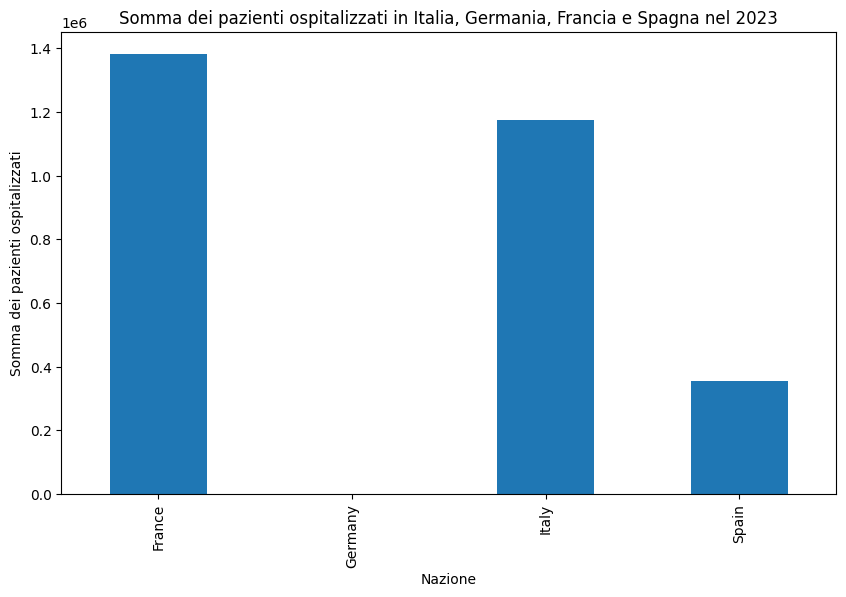

843


In [36]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

# Filtrare i dati per Italia, Germania, Francia e Spagna nel 2023
df_it_ger_fra_spa_2023 = df[
    (df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
    (df['date'] >= '2023-01-01') & (df['date'] <= '2023-12-31')]

# Calcolare la somma dei pazienti ospitalizzati per ogni nazione
hosp_patients_by_country = df_it_ger_fra_spa_2023.groupby('location')['hosp_patients'].sum()

# Stampare i risultati
print(hosp_patients_by_country)

# Creare il grafico a barre
plt.figure(figsize=(10, 6))
hosp_patients_by_country.plot(kind='bar')
plt.title('Somma dei pazienti ospitalizzati in Italia, Germania, Francia e Spagna nel 2023')
plt.xlabel('Nazione')
plt.ylabel('Somma dei pazienti ospitalizzati')
plt.show()

# Verifica dei dati nulli
print(df_it_ger_fra_spa_2023['hosp_patients'].isnull().sum())

# Se la quantità di dati nulli è piccola, si potrebbe considerare la sostituzione con la media o la mediana dei valori non nulli.
# Tuttavia, se la quantità di dati nulli è significativa, la sostituzione potrebbe introdurre distorsioni nei dati.
# In questo caso, potrebbe essere più appropriato rimuovere le righe con dati nulli o utilizzare metodi di imputazione più sofisticati.
